In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import msgpack as mp
import msgpack_numpy as mpn
import os
import sys
import cv2
import glob
# directory reach
directory = os.path.abspath('')
append_path = os.path.dirname(directory) # go two folders up
from pykinect2 import PyKinectRuntime
from pykinect2 import PyKinectV2

kinectColor = PyKinectRuntime.PyKinectRuntime(PyKinectV2.FrameSourceTypes_Color)
import pickle
# setting path
sys.path.append(append_path)

from cv2 import aruco

from support.pd_support import *
from support.calculations_support import *
from support.generate_ar_data import get_ar_pose_data, detect_ar_markers
from support.camera_calibration import *
from support.ar_calculations import *

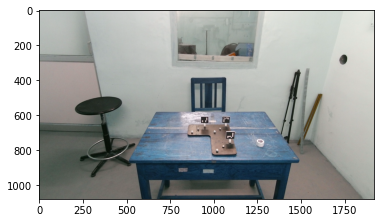

In [2]:
while True:
    if kinectColor.has_new_color_frame():
        color_frame = kinectColor.get_last_color_frame()
        color_frame = np.reshape(color_frame, (1080, 1920, 4))
        
        break
plt.imshow(color_frame)

_pth_calibration = r"C:\Users\CMC\Dropbox\mira\mira_vellore\splitVideos\ARUCXXXXMARKU010120000000XXXXXXXXX\Session 20-07-22_10-53-15_690"

calib_pth = os.path.join(_pth_calibration, "AR_CALIBRATION.msgpack")
_calib_file = open(calib_pth, "rb")
unpacker = mp.Unpacker(_calib_file, object_hook=mpn.decode)
_calib = []
for unpacked in unpacker:
    _calib.append(unpacked)

cameraMatrix = _calib[0][0]
distCoeffs = _calib[0][1]

In [ ]:
kinectColor.close()


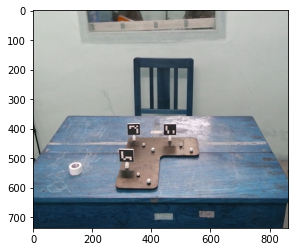

In [3]:
yPos = 112
xPos = 274

yRes = 736
xRes = 864
scalling = 2

color_frame = color_frame[yPos * scalling:yPos * scalling + yRes,
                         xPos * scalling:xPos * scalling + xRes].copy()
color_frame = cv2.flip(color_frame, 1)
plt.imshow(color_frame)

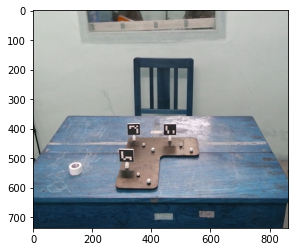

In [4]:
plt.imshow(color_frame)
calib_file = open("new_l_frame3.pickle", "wb")
pickle.dump(color_frame, calib_file)
calib_file.close()

calib_file = open("new_l_frame3.pickle", "rb")
calib_img = pickle.load(calib_file)
calib_file.close()
plt.imshow(calib_img)

In [ ]:
"""detect the aruco markers"""
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_ARUCO_ORIGINAL)
arudo_parameters = aruco.DetectorParameters_create()

corners, ids, rejectedImgPoints = detect_ar_markers(calib_img, arudo_parameters, aruco_dict)

rotation_vector, translation_vector, _ = cv2.aruco.estimatePoseSingleMarkers(corners, 0.05, cameraMatrix, distCoeffs)
rotation_vector

"""

Idx: 6 - zvector
Idx: 9 - orgin
Idx: 10 - xvector
"""

print(ids)

zvec = translation_vector[0][0]
zvec = np.reshape(zvec, (3, 1))
org = translation_vector[1][0] 
org = np.reshape(org, (3, 1))
xvec = translation_vector[2][0]
xvec = np.reshape(xvec, (3, 1))


translation_vector
zvec
rotMat = calculate_rotmat(xvec, zvec, org)
rotMat

# print(org)
# print(zvec)
# print(org - zvec)

t_xvec = xvec - org 

translation_correction = np.array([0.045, -0.05, 0.045]).reshape(3, 1) # adding the corrections in the new L frame

rotMat.T@t_xvec + translation_correction